# 📓 Lab 1 - Intro to Probabilistic Programming (Part 1 - Bayes)

# ❗❗❗ Very important administrative detail before we get to know each other

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   week 3 & week 4 - lab2
*   ...


# Bayes' Theorem

Let $A, B$ events with $P(B) \ne 0$. Then:

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

This theorem stands for any events $A, B$. Now, let's call ourselves scientists 🥼 in the middle of an experiment. We start by believing in a hypothesis $H$. Then, we see the evidence, $E$, resulting from an experiment run.


---


*What is the confidence in the hypothesis now that we have seen new data?*

Given Bayes' theorem, we can **update** the belief:

$$
P(H|E) = \frac{P(E|H) P(H)}{P(E)}
$$



*   The **PRIOR** $P(H)$ is the confidence in $H$ before evidence $E$ (it does not depend on $E$)
*   The **EVIDENCE** $P(E)$ does not depend on $H$ and is the same for any hypothesis $H$ we consider.
*   The **LIKELIHOOD** $P(E|H)$ is a compatibility measure between evidence and hypothesis. *(What is the probability to see the evidence $E$ if we believe in $H$?)*
*   The **POSTERIOR** $P(H|E)$ is our new belief in $H$. Now that we see data, we can update our belief about a hypothesis.

In other words **Bayes's Theorem** measures the probability that a hypothesis \( H \) is true given some observed evidence \( E \).  
It updates our initial belief \( P(H) \) (the *prior*) using how likely the evidence is if the hypothesis were true \( P(E|H) \), and normalizes it by the overall probability of observing that evidence \( P(E) \).

## Bayes' Theorem in practice

***Problem Statement:***

I own 2 coins: a fair coin $C_1$ (equivalent to $P(X=Heads | C=C_1) = 0.5$) and a strongly biased one $C_2$ with $P(X=Heads | C=C_2) = 0.9$. I put them in a bag, choose one *without looking* (**completely random**), toss it, and find it lands Tails. Which coin is more probable to have been picked and why?



---

***Intuition and Bayesian Solution***

It is an immediate intuition to say that $C_1$ was chosen, given the low rate of $C_2$ to come up Tails.

Which one was picked from the bag? I don't know yet, but I know that I choose one *without looking* (**completely random**). This means I give $PRIOR$ chances equal for both coins: $P(C=C_1) = P(C=C_2) = 0.5$.

Let $H$ and $T$ be the events of seeing Heads and Tails. With the new **EVIDENCE**
$P(X=T) = P(X=T|C=C_1)P(C=C_1) + P(X=T|C=C_2)P(C=C_2) = 0.5\times0.5 + 0.5\times0.1 = 0.3$,

the belief is updated with:

$P(C=C_i|X=T)=\frac{P(X=T|C=C_i)P(C=C_i)}{P(X=T|C=C_1)P(C=C_1) + P(X=T|C=C_2)P(C=C_2)}$

Then,

$P(C=C_1|X=T)=\frac{0.5\times0.5}{0.3}=\frac{5}{6}$

$P(C=C_2|X=T)=\frac{0.1\times0.5}{0.3}=\frac{1}{6}$

are the ***POSTERIOR*** beliefs in the coins.



### What if I favour one of the coins? What element of Bayes does this change?

A coin-building factory outputs coins $c_1, c_2, ...$ with different biases $p_1, p_2, ...$. Once the owner finds that $c_1$ is not fair, he starts halving the amount of the heavier materials in the coin-making process, each coin being lighter than the one before. I buy the first 10 coins, pull one from the ***top of the bag***, toss it, and it comes up Tails. Which coin did I probably pick?

### Bayesian Coin Problem- solution

We have 10 coins $ c_1, c_2, \dots, c_{10} $.  
Coin $ c_1$ is biased toward **Heads** with probability $p_1 > 0.5$.  
For each new coin, the owner *halves the heavier material*, so each coin gets closer to fair:

$$
p_{i+1} = 0.5 + \frac{p_i - 0.5}{2}
$$

We pick one coin uniformly at random and toss it once.  
The result is **Tails**.  
We want the posterior probability:

$$
P(c_i \mid T) = \frac{P(T \mid c_i) \, P(c_i)}{P(T)}
$$

Since all coins are equally likely before tossing $P(c_i) = \frac{1}{10}$, this simplifies to:

$$
P(c_i \mid T) \propto (1 - p_i)
$$

That is, coins with higher $ 1 - p_i $ (more chance of Tails) become more likely once we observe a Tail. (so as $p_i$ gets smaller and smaller the probability of tails increases)

---

### 🧮 Steps

1. Define the bias sequence $ p_i $ using the halving rule.  
2. Compute the likelihood of Tails for each coin: 
$$
 P(T \mid c_i) = 1 - p_i
 $$  
3. Compute the total probability of Tails (the evidence):

   $$
   P(T) = \frac{1}{10} \sum_{i=1}^{10} (1 - p_i)
   $$

4. Compute the posterior for each coin:

   $$
   P(c_i \mid T) = \frac{(1 - p_i)/10}{P(T)}
   $$

5. Display the results in a table and plot.


,Coin,P(Heads),P(Tails),Prior,Posterior | Tails
0,c1,0.9000,0.1000,0.1,0.0238
1,c2,0.7000,0.3000,0.1,0.0714
2,c3,0.6000,0.4000,0.1,0.0952
3,c4,0.5500,0.4500,0.1,0.1071
4,c5,0.5250,0.4750,0.1,0.1131
5,c6,0.5125,0.4875,0.1,0.1160
6,c7,0.5062,0.4938,0.1,0.1175
7,c8,0.5031,0.4969,0.1,0.1183
8,c9,0.5016,0.4984,0.1,0.1187
9,c10,0.5008,0.4992,0.1,0.1188


Total probability of Tails (Evidence): 0.4201

Top 3 most likely coins after seeing Tails:
  Coin  P(Heads)  P(Tails)  Prior  Posterior | Tails
9  c10    0.5008    0.4992    0.1             0.1188
8   c9    0.5016    0.4984    0.1             0.1187
7   c8    0.5031    0.4969    0.1             0.1183


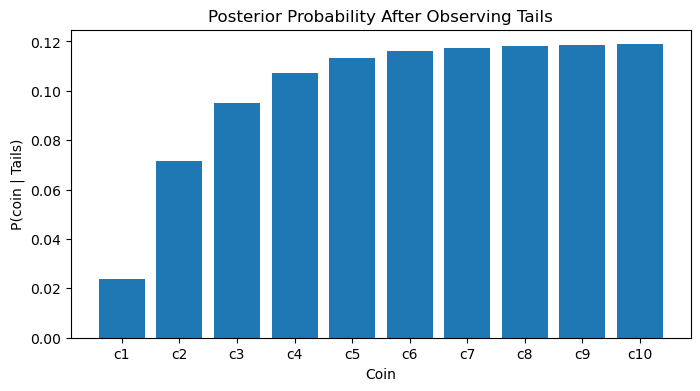

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Define bias model ---
n = 10          # number of coins
p1 = 0.9        # initial bias for coin c1 (heavily toward Heads)

p = np.empty(n)
p[0] = p1
for i in range(1, n):
    #halfing the exces each iteration p[i-1] - 0.5
    p[i] = 0.5 + (p[i-1] - 0.5)/2  # each coin is closer to fair

# --- Step 2: Compute probabilities ---
priors = np.full(n, 1/n)
likelihood_tails = 1 - p
evidence_T = np.dot(likelihood_tails, priors)
posteriors = (likelihood_tails * priors) / evidence_T

# --- Step 3: Display results ---
df = pd.DataFrame({
    "Coin": [f"c{i+1}" for i in range(n)],
    "P(Heads)": np.round(p, 4),
    "P(Tails)": np.round(likelihood_tails, 4),
    "Prior": priors,
    "Posterior | Tails": np.round(posteriors, 4)
})

display(df)

print(f"Total probability of Tails (Evidence): {evidence_T:.4f}")
print("\nTop 3 most likely coins after seeing Tails:")
print(df.sort_values('Posterior | Tails', ascending=False).head(3))

# --- Step 4: Plot posterior distribution ---
plt.figure(figsize=(8,4))
plt.bar(df["Coin"], df["Posterior | Tails"])
plt.xlabel("Coin")
plt.ylabel("P(coin | Tails)")
plt.title("Posterior Probability After Observing Tails")
plt.show()


### What if we see more data? New throws after the first Tails



```
1) T, H, H, H, H, T, H, H, H, H, H
2) T, H, H, T, H, T, H, T, T, H, T
```



What is your intuition for sequences of throws 1 and 2? Which one of the two coins from the exercise above generated them?


---

By applying Bayes on the sequences of throws, the likelihood looks like:

$P(X|(T, H, H, H, H, T, H, H, H, H, H))$

If $p$ is the probability of the coin and data *d* = (T, H, H, H, H, T, H, H, H, H, H), then the likelihood is viewed as a *function* of $p$, $\mathcal{L}(p|d)$. One proper likelihood distribution for this example is the **binomial** distribution which models the number of successes in a given number of binary experiments.

### I. The intuition
For the first sequence considering the large number of H, the coin with a heavy bias towards H probably produced it
1. P(X=H)=9/11=82% which is close to the bias of the second coin towards Head
2. P(X=T)=6/11=55% which is close to the bias of first coin towards Tails

### II. Likelihood ratio using binomial distribution

We observed the sequence  
 $d_1$ = (T, H, H, H, H, T, H, H, H, H, H) 
which contains  n = 11  tosses and k = 9 Heads.

The **binomial likelihood function** for observing this data, given a coin bias p = P(Heads), is:

$$
\mathcal{L}(p \mid d_1) = \binom{n}{k} p^k (1-p)^{n-k}
$$

1. Likelihood for the *fair coin* $ C_1 $ with \( p = 0.5 \):

$$
\mathcal{L}(0.5 \mid d_1)
= \binom{11}{9} (0.5)^9 (1 - 0.5)^2
= 55 \times (0.5)^{11}
= 55 \times \frac{1}{2048}
\approx 0.0269
$$


2. Likelihood for the *biased coin* \( C_2 \) with \( p = 0.9 \):

$$
\mathcal{L}(0.9 \mid d_1)
= \binom{11}{9} (0.9)^9 (1 - 0.9)^2
= 55 \times (0.9)^9 \times (0.1)^2
\approx 55 \times 0.387 \times 0.01
\approx 0.213
$$


3. Comparison

$$
\frac{\mathcal{L}(0.9 \mid d_1)}{\mathcal{L}(0.5 \mid d_1)} 
\approx \frac{0.213}{0.0269} 
\approx 7.9
$$

This means the observed data is **about 8 times more likely** under the biased coin $p = 0.9$ than under the fair coin $p = 0.5$.

#### Likelihood Computation for Sequence 2

Sequence:

$ d_2 = (T, H, H, T, H, T, H, T, T, H, T) $

- Tosses: $ n = 11 $
- Heads: $ k = 5 $, Tails: $ n-k = 6 $

Binomial likelihood function for coin bias $ p$:

$$
\mathcal{L}(p \mid d_2) = \binom{11}{5} p^5 (1-p)^6 = 462 \, p^5 (1-p)^6
$$


1. Likelihood for the coins

- **Fair coin** :  $\mathcal{L}(0.5 \mid d_2) = 462 \times 0.5^5 \times 0.5^6 = 462 \times 0.5^{11} \approx 0.2256$

- **Biased coin**:   $\mathcal{L}(0.9 \mid d_2) = 462 \times 0.9^5 \times 0.1^6 \approx 0.000273$

2. Interpretation

- The fair coin $C_1$ is overwhelmingly more likely to have produced this sequence.  
- Reasonable, because the sequence contains many Tails that the heavily biased coin would rarely produce.


## Machine Learning - Classical vs. Bayesian

If classical ML practitioners are interested in prediction, the bayesians compute the probabilities and measure the uncertainty.

Notice the difference - *Predict which coin I picked from the bag* vs. *Compute the posterior for both coins*

# Bayesian Inference

For complex, statistical models of a problem, we model the priors and likelihoods with known distributions. Let's say a data sample $x$ comes from a distribution $p(x|\theta)$. $\theta$ is called the *parameter* of the distribution (it can also be a vector of values). Since the value of $\theta$ is unknown, let's set it also with a distribution $p(\theta|\alpha)$ ($\alpha$ is called *hyperparameter*). If $\mathbf{X}$ is the data vector $x_1, x_2, ...x_n$ of observed data samples, then:

$p(\theta| \mathbf{X}, \alpha) = ...=\frac{p(\mathbf{X}|\theta, \alpha)p(\theta|\alpha)}{p(\mathbf{X}|\alpha)}$

This is the formal definition of, again: The posterior probability distribution of $\theta$ after seeing new data $\mathbf{X}$ is (likelihood×prior / evidence)

# Probabilistic Programming

Probabilistic Programming (PP) is a programming paradigm that automates bayesian inference. We will come back to *how* they do it in a few weeks.

A *probabilistic* program models a *probabilistic story* of the world. We declare the variables (*probability distributions*) and run the program (an *inference algorithm*) to obtain the *posterior distribution*.

Here is a schematic of programming paradigms, as you can see PP is not depicted in this image. It would need a branch of its own given its probabilistic nature.

It's ok, you don't need to know them by heart 💀💀💀💀💀💀
<img src="https://www.cse.iitm.ac.in/~jayalal/images/paradigms.png" height="700" width="700">

Now we have distributions for prior and likelihood. How do they look like? We can use python libraries like NumPy and SciPy



## Code for distributions and exercises



*   The discrete uniform distribution
    - An experiment has **n** possible outcomes, each of them has equal probability of **1/n**
    - For example, a dice throw has 6 possible outcomes from 1 to 6, each with a probability of 1/6 (if the dice is fair).
*   The continuous uniform distribution
    - An experiment has an arbitrary outcome from a range of values
    - For example, the moment you receive a call when you expect one in the interval [9 a.m. - 11 a.m.].


---



Let's draw uniform samples from [0,1) and plot them in a histogram *(why histogram and not a simple plot?)*.



<img src="https://i.ytimg.com/vi/Pw3CawDBTaQ/maxresdefault.jpg" height="300" width="500">

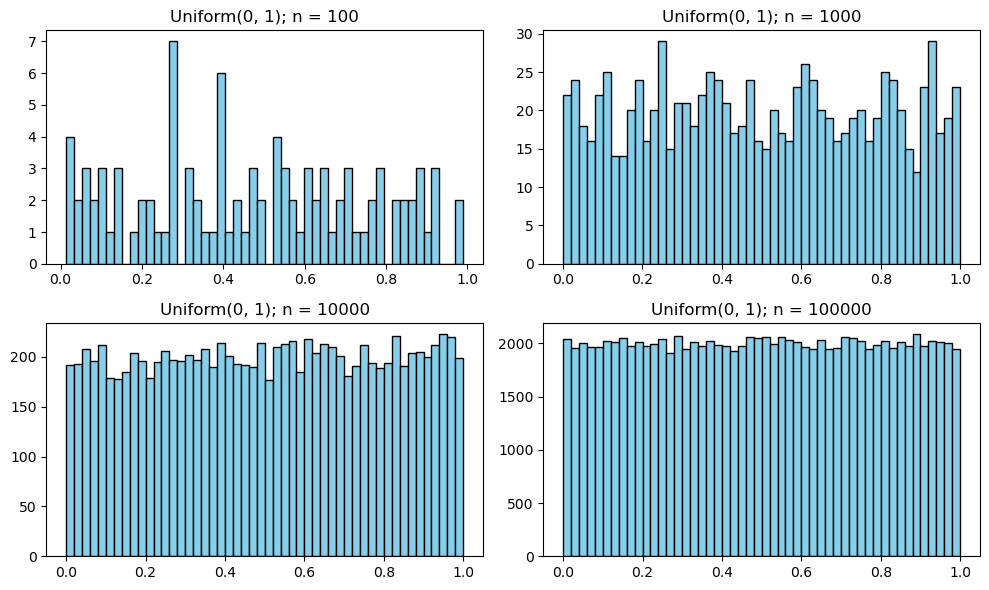

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample_sizes = [100, 1000, 10000, 100000]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    unif = np.random.uniform(0, 1, n)
    #we divide the [0,1] interval into 50 bins
    axes[i].hist(unif, bins=50, density=False, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Uniform(0, 1); n = {n}')

plt.tight_layout()
plt.show()

In a histogram:

- the x-axis shows the intervals (bins) you divided your range into $(e.g. [0–0.1), [0.1–0.2), …)$,

- the y-axis shows how many samples (or sometimes the proportion / probability density) fell into each interval.

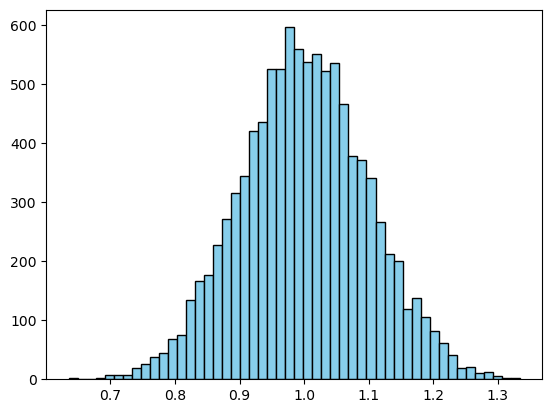

0.9996868199997121
0.9988379575683329
0.9788805744752253


In [3]:
# Open # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

import numpy as np
import matplotlib.pyplot as plt

# TODO 1: Draw 10^4 samples from a Normal distribution with mean 1 and standard deviation 0.1

v = np.random.normal(1, 0.1, 10000)

# TODO 2: Plot the values in a histogram in 50 bins.

plt.hist(v, bins=50, color='skyblue', edgecolor='black')
plt.show()

# TODO 3: What is the difference between mean, median, and mode? Find them using NumPy

# mean - sum of all elements divided by the size of the array
print(np.mean(v))

# median - 50% are lower than the median and 50% are higher than the median
print(np.median(v))

# mode - most frequent value - hard to compute with continuous data
# we estimate it from the most frequent bin using a histogram
hist, bin_edges = np.histogram(v, bins='auto')
target_bin = np.argmax(hist)
print((bin_edges[target_bin] + bin_edges[target_bin + 1]) / 2)


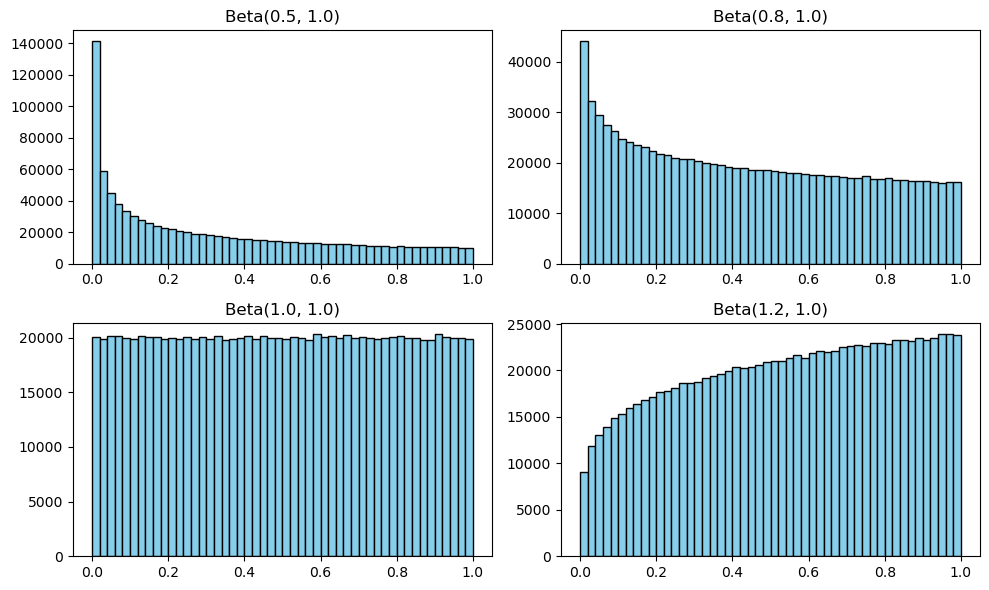

In [4]:
# Open https://en.wikipedia.org/wiki/Beta_distribution
# The Beta distribution has two parameters.

# TODO 4: What is the support of this distribution? Where can it be used then?

# The support for Beta is (0, 1) -> can be used for modeling probabilities

import numpy as np
import matplotlib.pyplot as plt

# TODO 5: Use the code from the first example to generate 2x2 plots of drawing
# 10^6 samples from Beta with beta=1.0 and alpha in [0.5, 0.8, 1.0, 1.2]. Use
# 50 bins in the histogram.

# Anything interesting?

N = 1000000

beta = 1.0
alphas = [0.5, 0.8, 1.0, 1.2]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    v = np.random.beta(a=alpha, b=beta, size=N)
    axes[i].hist(v, bins=50, density=False, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Beta({alpha}, {beta})')

plt.tight_layout()
plt.show()

# Something interesting - beta(1, 1) looks like uniform(0, 1)


# Additional exercises after the first lecture

## Bayes' Theorem

Assume the probability of having tuberculosis (TB) is 0.0005, and a test for TB is 99% accurate. What is the probability one has TB if one tests positive for the disease?


---
Let $X, Y$ be the random variables needed. $X=1/0$ for *a person has/does not have TB* and $Y=1/0$ for *a test is positive/negative*.

The prior of having TB is $P(X=1)=0.0005$, so $P(X=0) = 0.9995$

❗ Confusion regarding "99% test accuracy".

 - With no additional information, we'll treat "99% accuracy" as $P(Y=1|X=1) = P(Y=0|X=0) = 0.99$ → the test outputs *correctly* for either someone with or without TB.

What we are interested in (the posterior): $P(X=1|Y=1)$

Using Bayes:

$P(X=1|Y=1) = \frac{P(Y=1|X=1)P(X=1)}{P(Y=1)}=\frac{P(Y=1|X=1)P(X=1)}{P(Y=1|X=1)P(X=1) + P(Y=1|X=0)P(X=0)} ≈ 0.047$



## Distributions

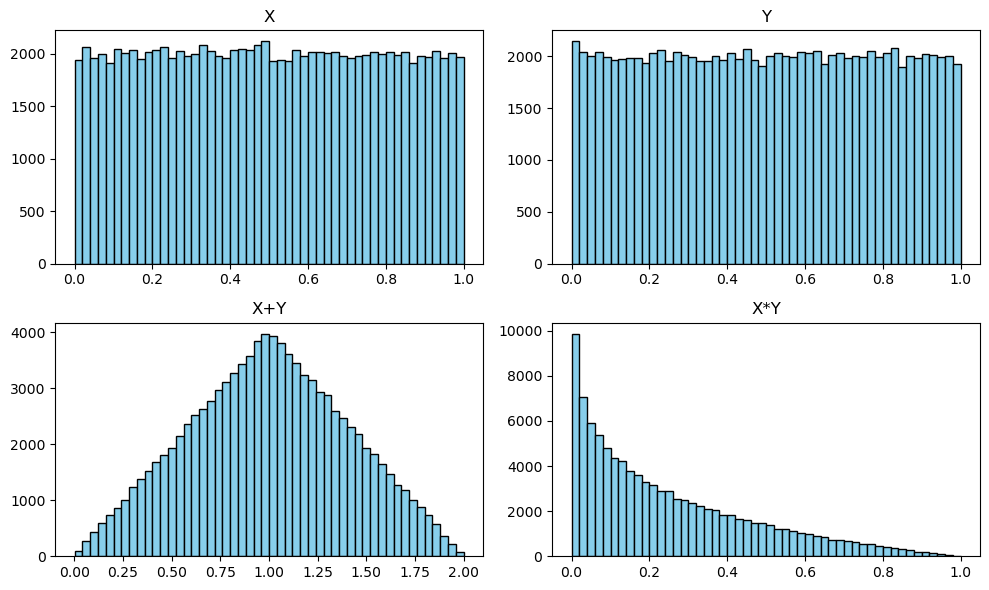

In [5]:
# Let X and Y be two independent uniform random variables.
# Draw them with NumPy and use a 2x2 plot like before
# to visualize X, Y, X+Y, X*Y

import numpy as np
import matplotlib.pyplot as plt


N = 100000 #we choose the samples from 10000 variables from [0,1]
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

axes[0].hist(x, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('X')
axes[1].hist(y, bins=50, color='skyblue', edgecolor='black')
axes[1].set_title('Y')
axes[2].hist(x+y, bins=50, color='skyblue', edgecolor='black')
axes[2].set_title('X+Y')
axes[3].hist(x*y, bins=50, color='skyblue', edgecolor='black')
axes[3].set_title('X*Y')

plt.tight_layout()
plt.show()

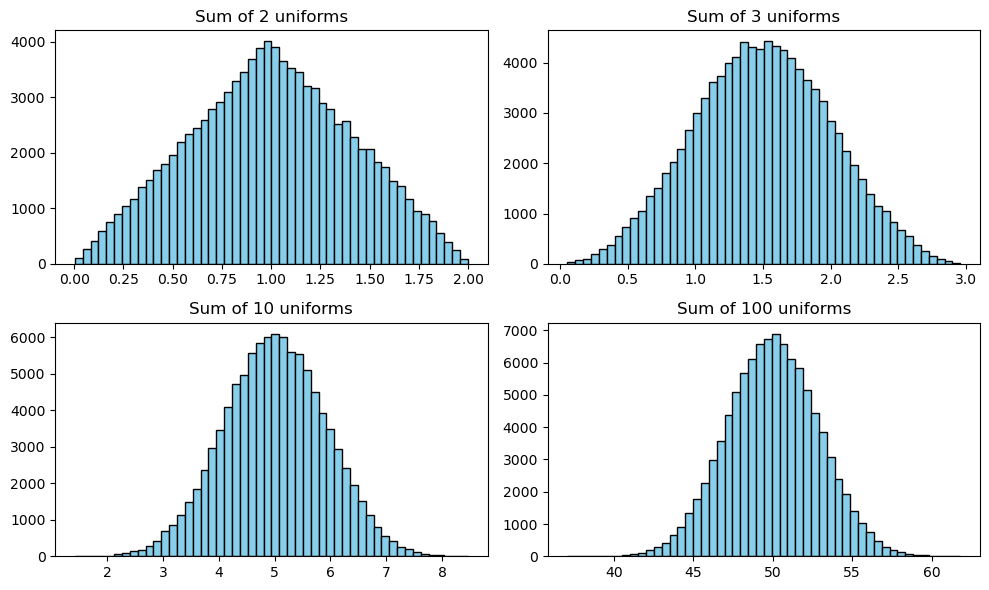

In [6]:
# Open https://en.wikipedia.org/wiki/Central_limit_theorem
# Let's plot the histogram for a sum of n independent uniform random variables
# Use n = [2, 3, 10, 100] and the 2x2 plot style and draw 10^5 from each uniform.

import numpy as np
import matplotlib.pyplot as plt


n = [2, 3, 10, 100] # how many random variables we sum
N = 100000

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

# so we pick k random variables from N samples in the [0,1] interval np.random.uniform(0, 1, (k, N))
# and then we add them np.sum
for i, k in enumerate(n):
    axes[i].hist(np.sum(np.random.uniform(0, 1, (k, N)), axis=0), bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Sum of {k} uniforms')

plt.tight_layout()
plt.show()